### Passo 1 - Trazer sua base de dados para o Python e ver o que tem nela

In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [62]:



tabela = pd.read_excel("DADOS_GERAIS.xlsx",header=2)
display(tabela)

/home/diogo/anaconda3/envs/myenv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,CODPROD,CODTIPO,CODPARC,CODCID,HL,LT,VLRFAT,CUSSEMICM,GASTO_VARIAVEL,MARGEM_CONTRIB,GASTO_FIXO,RESULTADO,PERCE,FREQUENCIA
0,418,4,13449,857,0.03,3.0,15.71,3.99,5.17,6.545608,0.969187,5.576421,0.000511,1
1,418,4,13480,2,0.03,3.0,13.50,3.99,4.71,4.795608,0.832847,3.962761,0.000375,1
2,418,4,30649,857,0.03,3.0,13.51,3.99,4.92,4.595608,0.833464,3.762144,0.000359,1
3,418,4,48814,4968,0.06,6.0,24.99,7.16,9.62,8.213848,1.541692,6.672156,0.000642,1
4,418,4,52905,278,0.03,3.0,12.50,3.58,4.80,4.121924,0.771155,3.350769,0.000322,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,630,4,514726,1875,10.26,1026.0,2149.60,806.43,753.22,589.954944,132.613910,457.341034,0.046081,2
4996,469,4,522055,227,0.24,24.0,59.60,35.32,39.99,-15.707680,3.676865,-19.384545,-0.001227,3
4997,604,3,31104,2,0.19,19.2,84.81,39.18,138.42,-92.793648,5.232130,-98.025778,-0.007248,3
4998,604,3,518903,2,0.10,9.6,42.40,98.11,345.98,-401.690032,2.615756,-404.305788,-0.031376,3


### Passo 2 - Pegar um panorama geral sobre a sua base de dados

In [63]:
faturamento_total = tabela["VLRFAT"].sum()
print(faturamento_total)

380068.56


### Passo 3 - Começar sua análise Top -> Down

In [64]:
# faturamento por loja
faturamento_por_cidade = tabela[["CODCID", "VLRFAT"]].groupby("CODCID").sum()
display(faturamento_por_cidade)

,VLRFAT
CODCID,
2,65534.51
4,72787.55
8,451.03
227,23356.46
278,23587.77
...,...
5582,133.66
5583,1187.61
5585,-105.12


### Passo 4 - Entrar no detalhe pra entender

In [65]:
faturamento_por_produto = tabela[["CODCID","CODPROD","FREQUENCIA", "VLRFAT"]].groupby(["CODCID","CODPROD","FREQUENCIA"]).sum()
display(faturamento_por_produto)

VLRFAT
CODCID CODPROD FREQUENCIA         
2      418     1             13.50
       426     1             52.80
       469     1            725.09
       510     1           3216.94
               2           6480.02
...                            ...
5585   604     1            -69.01
       620     1            -36.11
5586   469     1            -32.30
5589   510     1             47.15
       604     1             45.91

[440 rows x 1 columns]

In [66]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODPROD         5000 non-null   int64  
 1   CODTIPO         5000 non-null   int64  
 2   CODPARC         5000 non-null   int64  
 3   CODCID          5000 non-null   int64  
 4   HL              5000 non-null   float64
 5   LT              5000 non-null   float64
 6   VLRFAT          5000 non-null   float64
 7   CUSSEMICM       5000 non-null   float64
 8   GASTO_VARIAVEL  5000 non-null   float64
 9   MARGEM_CONTRIB  5000 non-null   float64
 10  GASTO_FIXO      5000 non-null   float64
 11  RESULTADO       5000 non-null   float64
 12  PERCE           5000 non-null   float64
 13  FREQUENCIA      5000 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 547.0 KB


In [67]:
tabela.shape

(5000, 14)

In [68]:
tabela.columns

Index(['CODPROD', 'CODTIPO', 'CODPARC', 'CODCID', 'HL', 'LT', 'VLRFAT',
       'CUSSEMICM', 'GASTO_VARIAVEL', 'MARGEM_CONTRIB', 'GASTO_FIXO',
       'RESULTADO', 'PERCE', 'FREQUENCIA'],
      dtype='object')

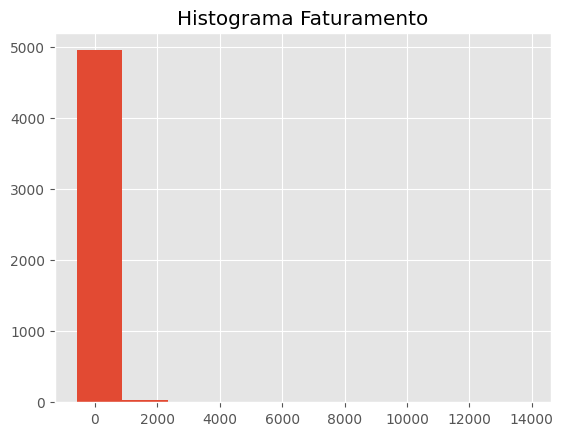

In [69]:
_ = plt.hist(tabela.VLRFAT)
_ = plt.title("Histograma Faturamento")

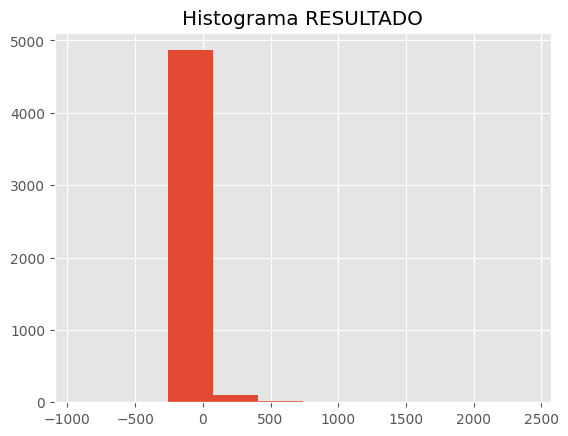

In [70]:
_ = plt.hist(tabela.RESULTADO)
_ = plt.title("Histograma RESULTADO")

In [71]:
tabela.CODCID.value_counts()

CODCID
4       908
2       715
762     661
227     331
278     299
       ... 
808       1
5377      1
849       1
850       1
366       1
Name: count, Length: 98, dtype: int64

In [72]:
tabela.CODCID.value_counts(1)

CODCID
4       0.1816
2       0.1430
762     0.1322
227     0.0662
278     0.0598
         ...  
808     0.0002
5377    0.0002
849     0.0002
850     0.0002
366     0.0002
Name: proportion, Length: 98, dtype: float64

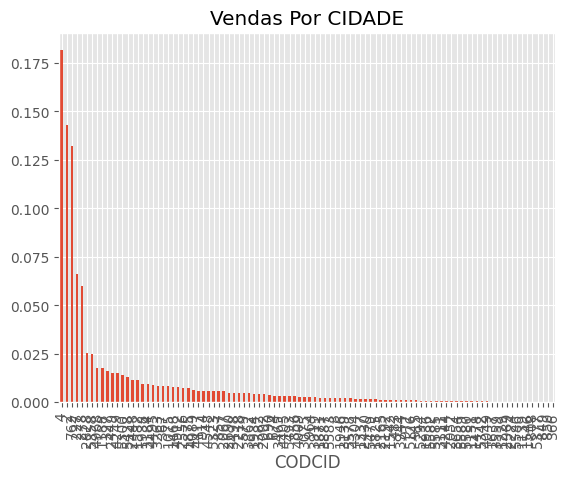

In [73]:
_ = tabela.CODCID.value_counts(1).plot.bar()
_ = plt.title("Vendas Por CIDADE")

In [78]:
tabela.corr()

ValueError: could not convert string to float: 'GREATER CODCID'